In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline
%config Completer.use_jedi = False

In [221]:
#Load MAF file which has been filtered for protein coding variants and FPKM file for cancer type

#Add path to files
path = r'/Users/jake/OneDrive - University of Glasgow/Project/COAD/GeneExpression_MAF'

all_files = glob.glob(path + "/*.csv")

#For loop to read in files        
for filename in all_files:
    
    if 'MAF_protein' in filename:
        MAF_protein = pd.read_csv(filename,sep=',',index_col=0,low_memory=False)
    elif 'FPKM_protein' in filename:
        FPKM = pd.read_csv(filename, sep='\t',index_col=0,header=[0,1])


In [225]:
FPKM.head()

Gene_symbol,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1
Gene_ensembl_id,ENSG00000121410,ENSG00000148584,ENSG00000175899,ENSG00000166535,ENSG00000184389,ENSG00000128274,ENSG00000118017,ENSG00000094914,ENSG00000081760,ENSG00000114771,...,ENSG00000086827,ENSG00000174442,ENSG00000122952,ENSG00000198205,ENSG00000198455,ENSG00000070476,ENSG00000203995,ENSG00000162378,ENSG00000159840,ENSG00000074755
Sample_ID,,,,,,,,,,,,,,,,,,,,,
TCGA-AA-3867-01A-01R-1022-07,0.052551,2.477200,57.378073,0.021620,0.0,5.347004,0.000000,10.124001,3.888190,0.031552,...,8.337702,3.266961,11.951200,0.844530,2.250194,4.091899,0.011212,3.216321,87.952703,2.923495
TCGA-CA-6719-01A-11R-1839-07,0.005613,1.927244,74.944713,0.012317,0.0,4.271353,0.025395,11.569886,1.872340,1.159435,...,10.875540,6.107697,11.915234,1.711313,4.772996,4.795855,0.009581,5.434010,72.500361,5.158080
TCGA-NH-A50V-01A-11R-A28H-07,0.035237,0.550182,51.276491,0.024852,0.0,5.097944,0.056933,10.462945,3.612377,0.193436,...,7.953033,1.813204,14.288954,1.255144,4.156986,5.492997,0.038664,3.399480,57.827137,3.430372
TCGA-AA-A01C-01A-01R-A00A-07,0.049092,1.914795,45.653386,0.013464,0.0,5.011742,0.000000,15.683433,3.708620,0.117902,...,7.460225,3.650127,22.783866,1.123639,2.886182,3.341388,0.000000,2.662764,116.008374,5.140081
TCGA-AA-A02F-01A-01R-A089-07,0.011685,1.145542,28.787736,0.006410,0.0,2.099586,0.000000,15.396349,2.902797,0.028064,...,7.259496,11.352859,21.240253,1.650287,4.630294,6.636417,0.000000,5.230433,68.590155,2.939338


In [226]:
#check no silent mutations present in 'Varaint Classification' col

for mutation_type in MAF_protein['Variant_Classification'].unique():
    if 'silent' in mutation_type.lower():
        raise ValueError("Silent Mutations in MAF")

In [227]:
#Drop all columns expect the various gene IDs and 'Tumour_Sample_Barcode'

MAF_protein_ID = MAF_protein[['Hugo_Symbol','Gene','Tumor_Sample_Barcode']]
MAF_protein_ID.rename(columns={'Gene':'Ensembl_ID'},inplace=True)
MAF_protein_ID.reset_index(drop=True,inplace=True)

/Users/jake/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:5042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [228]:
#Check the value counts of each gene per each sample

MAF_protein_ID[['Hugo_Symbol','Tumor_Sample_Barcode']].value_counts()

Hugo_Symbol  Tumor_Sample_Barcode        
TTN          TCGA-AA-A010-01A-01D-A17O-10    35
             TCGA-CA-6717-01A-11D-1835-10    33
             TCGA-AZ-4315-01A-01D-1408-10    28
             TCGA-AA-A00N-01A-02D-A17O-10    26
MUC16        TCGA-AA-A010-01A-01D-A17O-10    24
                                             ..
GPR35        TCGA-CM-4743-01A-01D-1719-10     1
             TCGA-CK-6746-01A-11D-1835-10     1
GPR34        TCGA-DM-A28H-01A-11D-A16V-10     1
             TCGA-AZ-4315-01A-01D-1408-10     1
pk           TCGA-F4-6570-01A-11D-1771-10     1
Length: 115923, dtype: int64

In [229]:
#Choose top gene and get the unqiue number of protein coding varaints for that gene
#This to check the upcoming groupby

MAF_protein_ID[MAF_protein_ID['Hugo_Symbol']=='TTN']['Tumor_Sample_Barcode'].value_counts().unique() 

array([35, 33, 28, 26, 19, 16, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [230]:
#Create a protein coding variants (PCV) dataframe which groupby symbol, Ensembl ID and sample barcode
# use size to count number of instances gene appears per sample, combined with unstack
#also transpose to have sample IDs as rows and gene as columns

MAF_PCV = MAF_protein_ID.groupby(['Hugo_Symbol','Ensembl_ID','Tumor_Sample_Barcode']).size().unstack(fill_value=0).T

In [231]:
MAF_PCV

Hugo_Symbol,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,pk
Ensembl_ID,ENSG00000121410,ENSG00000148584,ENSG00000175899,ENSG00000166535,ENSG00000184389,ENSG00000128274,ENSG00000118017,ENSG00000094914,ENSG00000081760,ENSG00000114771,...,ENSG00000122952,ENSG00000198205,ENSG00000198455,ENSG00000070476,ENSG00000203995,ENSG00000162378,ENSG00000159840,ENSG00000074755,ENSG00000036549,ENSG00000091436
Tumor_Sample_Barcode,,,,,,,,,,,,,,,,,,,,,
TCGA-3L-AA1B-01A-11D-A36X-10,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
TCGA-4N-A93T-01A-11D-A36X-10,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-4T-AA8H-01A-11D-A40P-10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
TCGA-5M-AAT4-01A-11D-A40P-10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-5M-AAT5-01A-21D-A40P-10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-QL-A97D-01A-12D-A40P-10,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-RU-A8FL-01A-11D-A36X-10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [232]:
#Now check unique values for gene identified above and it next cell compare

MAF_PCV['TTN']['ENSG00000155657'].unique()

array([ 0,  1,  2,  3,  6,  4,  8, 16, 10, 19, 11, 26, 35,  7,  5, 28, 33,
        9])

In [233]:
#Compare to determine groupby is collating required number of protein coding variants per gene per sample

set(MAF_protein_ID[MAF_protein_ID['Hugo_Symbol']=='TTN']['Tumor_Sample_Barcode'].value_counts().unique() ) - set(MAF_PCV['TTN']['ENSG00000155657'].unique())

#=> should return no values

set()

In [234]:
#Additional check ... from MAF_PCV above can see the first Tumor_Sample_Barcode has TWO variants for ZXDA => check

MAF_protein_ID[(MAF_protein_ID['Tumor_Sample_Barcode']=='TCGA-3L-AA1B-01A-11D-A36X-10')& (MAF_protein_ID['Hugo_Symbol'] == 'ZXDA')]

,Hugo_Symbol,Ensembl_ID,Tumor_Sample_Barcode
98230,ZXDA,ENSG00000198205,TCGA-3L-AA1B-01A-11D-A36X-10
98231,ZXDA,ENSG00000198205,TCGA-3L-AA1B-01A-11D-A36X-10


In [235]:
#Check number of unique samples and genes

display(MAF_protein_ID['Tumor_Sample_Barcode'].nunique())
display(MAF_protein_ID['Ensembl_ID'].nunique())

399

17618

In [236]:
#Number of protein coding varaints per gene across all samples

MAF_PCV.loc(axis=1)[:,:].sum().sort_values(ascending = False)

Hugo_Symbol  Ensembl_ID     
TTN          ENSG00000155657    545
APC          ENSG00000134982    302
MUC16        ENSG00000181143    243
SYNE1        ENSG00000131018    216
TP53         ENSG00000141510    194
                               ... 
C8orf37      ENSG00000156172      1
DENR         ENSG00000139726      1
OLIG1        ENSG00000184221      1
DEK          ENSG00000124795      1
FBXO16       ENSG00000214050      1
Length: 17618, dtype: int64

In [ ]:
### Create plots #### - 
#First a rough plot to show protein ncoding varaints across all genes
#Followed by plot zooming in on genes with greatest number of protein coding variants per gene per sample

Text(0.5, 1.0, 'COAD Number of Protein Coding Varaints per Gene - Total Across All Samples')

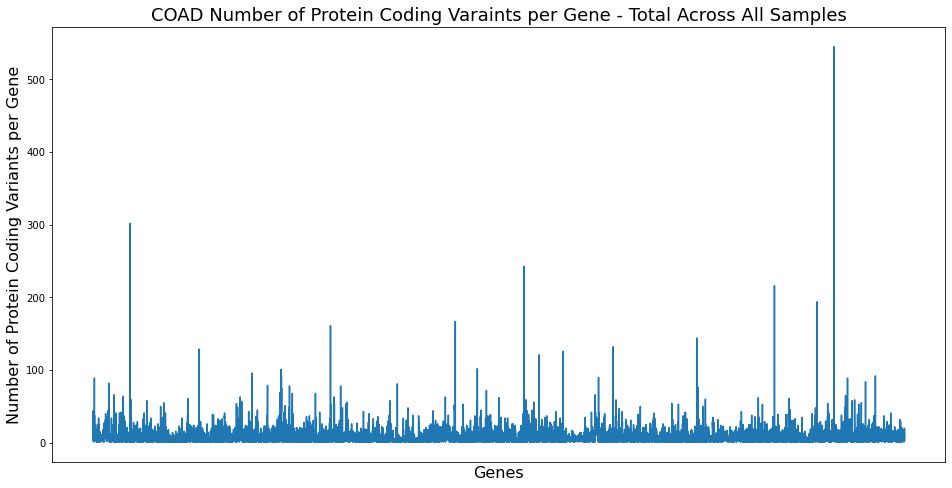

In [237]:
#Plot of number of number of protein coding varaints per gene across all samples

fig = MAF_PCV.loc(axis=1)[:,:].sum().plot(figsize=(16,8))
#fig.legend(['Tumour Samples','Normal Samples'],fontsize=14)
fig.set_xlabel('Genes',fontsize=16)
fig.set_xticks([])
fig.set_ylabel('Number of Protein Coding Variants per Gene',fontsize=16)
fig.set_title('COAD Number of Protein Coding Varaints per Gene - Total Across All Samples',fontsize=18)


In [238]:
#Create new dataframe with value counts column

MAF_PCV_values = ((MAF_PCV.loc(axis=1)[:,:].sum())/399).to_frame(name='Normalised_Value_Count')

In [239]:
MAF_PCV_values.sort_values(by='Normalised_Value_Count',ascending=False)

,,Normalised_Value_Count
Hugo_Symbol,Ensembl_ID,
TTN,ENSG00000155657,1.365915
APC,ENSG00000134982,0.756892
MUC16,ENSG00000181143,0.609023
SYNE1,ENSG00000131018,0.541353
TP53,ENSG00000141510,0.486216
...,...,...
C8orf37,ENSG00000156172,0.002506
DENR,ENSG00000139726,0.002506
OLIG1,ENSG00000184221,0.002506


In [240]:
#Filter out the 99 percentile of value counts ... note the dropna at the end since the comparison returns NAN for values not in 99 percentile

MAF_PCV_values_99 = MAF_PCV_values[MAF_PCV_values >= MAF_PCV_values['Normalised_Value_Count'].quantile(0.99)].dropna()

In [241]:
#Reset index and ame only Hugo symbol index
MAF_PCV_values_99.reset_index(level='Ensembl_ID',inplace=True)

In [15]:
#Get list of genes via index ( = hugo symbol) where value counts > 5000

#greater_than_5000_list = MAF_protein_ID_pivot_values_99[MAF_protein_ID_pivot_values_99.loc(axis=1)['Value_Count'] >= 5000].index

#Now get index positions of these genes, using enumerate, in original 99 percentile list for xticks labels

#xticks = [i for i,x in enumerate (MAF_protein_ID_pivot_values_99.index) if x in greater_than_1000_list]


In [242]:
#Get list of top 10 genes with highest value_counts via index ( = hugo symbol) 

top_10_genes_list = MAF_PCV_values_99.sort_values(by='Normalised_Value_Count',ascending=False).head(10).index

#Now get index positions of these genes, using enumerate, in original 99 percentile list for xticks labels

xticks = [i for i,x in enumerate (MAF_PCV_values_99.index) if x in top_10_genes_list]

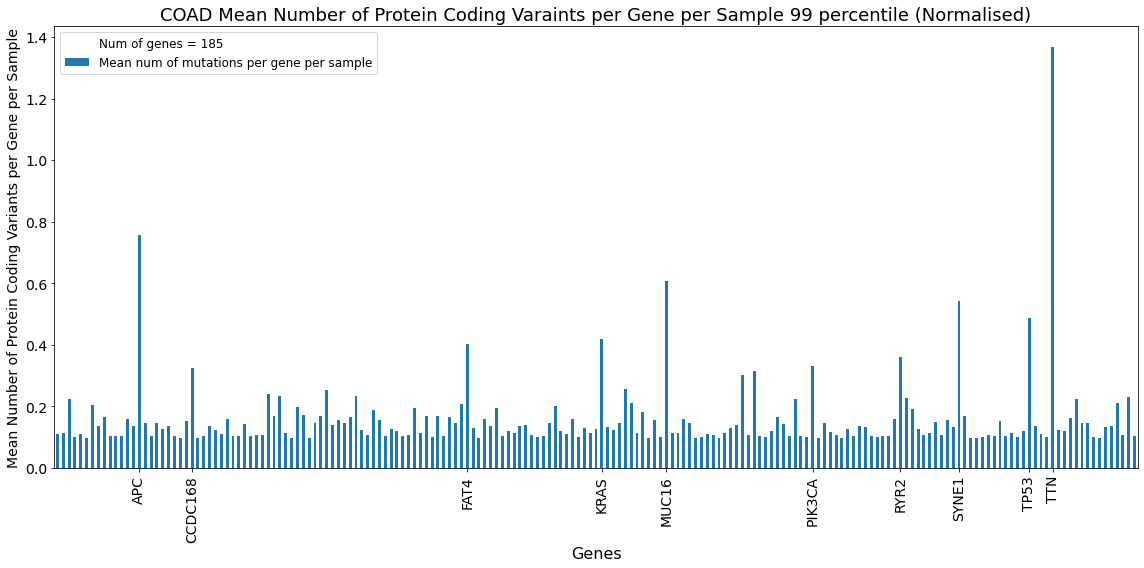

In [243]:
#Plot of num of protein coding variants for 99 percentile genes

fig = MAF_PCV_values_99.plot(kind='bar',figsize=(16,8),fontsize = 14)

fig.plot([], [], ' ',label= 'Num of genes = ' + str(len(MAF_PCV_values_99)))

fig.legend(['Num of genes = ' + str(len(MAF_PCV_values_99)),'Mean num of mutations per gene per sample'],fontsize=12)
fig.set_xlabel('Genes',fontsize=16)
fig.set_xticks(xticks)
fig.set_ylabel('Mean Number of Protein Coding Variants per Gene per Sample',fontsize=14)
fig.set_title('COAD Mean Number of Protein Coding Varaints per Gene per Sample 99 percentile (Normalised)',fontsize=18)
plt.tight_layout()


In [245]:
MAF_PCV_values_99

,Ensembl_ID,Normalised_Value_Count
Hugo_Symbol,,
A2ML1,ENSG00000166535,0.110276
ABCA12,ENSG00000144452,0.112782
ABCA13,ENSG00000179869,0.223058
ADAMTS16,ENSG00000145536,0.100251
ADGRB3,ENSG00000135298,0.110276
...,...,...
WDR87,ENSG00000171804,0.137845
XIRP2,ENSG00000163092,0.210526
ZFHX3,ENSG00000140836,0.107769


In [244]:
#Now filter FPKM file in relation to the 99 percentile genes

In [246]:
#Check for number of genes not present in FPKM

display(len(list(set(MAF_PCV_values_99['Ensembl_ID']) - set(FPKM.columns.levels[1]))))
display (len(list(set(MAF_PCV_values_99.index) - set(FPKM.columns.levels[0]) )))

1

1

In [248]:
#Create list of genes / columns to keep in FPKM .. use Ensembl ID
#ADD 'Cancer' TO LIST since = target variable

cols_to_keep_PCV = list(MAF_PCV_values_99['Ensembl_ID'])
cols_to_keep_PCV.append('Cancer')

In [249]:
#Filter FPKM for the cis_eQTL_95 genes

FPKM_PCV_95 = FPKM.loc(axis=1)[:, cols_to_keep_PCV]

In [255]:
FPKM_PCV_95

Gene_symbol,A2ML1,ABCA12,ABCA13,ADAMTS16,ADGRB3,ADGRL3,ADGRV1,AHNAK,AHNAK2,AKAP9,...,VPS13B,VPS13C,VWF,WDFY4,WDR87,XIRP2,ZFHX3,ZFHX4,ZNF536,Cancer
Gene_ensembl_id,ENSG00000166535,ENSG00000144452,ENSG00000179869,ENSG00000145536,ENSG00000135298,ENSG00000150471,ENSG00000164199,ENSG00000124942,ENSG00000185567,ENSG00000127914,...,ENSG00000132549,ENSG00000129003,ENSG00000110799,ENSG00000128815,ENSG00000171804,ENSG00000163092,ENSG00000140836,ENSG00000091656,ENSG00000198597,Cancer
Sample_ID,,,,,,,,,,,,,,,,,,,,,
TCGA-AA-3867-01A-01R-1022-07,0.021620,0.011179,0.030352,1.499085,0.121640,0.135352,0.022397,20.200119,4.289766,2.132927,...,2.276332,2.599332,9.390354,0.303750,0.000000,0.000000,1.656795,0.130844,0.085368,1
TCGA-CA-6719-01A-11R-1839-07,0.012317,0.007165,0.030653,1.016412,0.166318,0.064260,0.148329,29.137467,3.386743,3.430569,...,2.796830,2.935281,16.508106,0.561862,0.002445,0.000000,2.692915,0.576275,0.052109,1
TCGA-NH-A50V-01A-11R-A28H-07,0.024852,0.008567,0.051804,0.178853,0.003107,0.267953,0.003433,21.830503,0.692923,3.973332,...,1.834887,2.811640,9.039711,0.515633,0.004384,0.000000,2.213234,0.167115,0.042056,1
TCGA-AA-A01C-01A-01R-A00A-07,0.013464,0.031329,0.036086,0.352198,0.015151,0.098344,0.012553,16.912925,1.011015,2.116722,...,0.694124,1.739627,7.040496,0.158041,0.000000,0.000000,1.292120,0.087756,0.011393,1
TCGA-AA-A02F-01A-01R-A089-07,0.006410,0.009943,0.007363,0.135731,0.000000,0.053506,0.037849,17.680771,1.047399,3.902222,...,1.223768,4.291194,12.100373,0.082077,0.000000,0.000000,1.877477,0.032825,0.010847,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-A6-2682-11A-01R-A32Z-07,0.007358,0.009512,0.027234,0.094709,0.107639,0.850950,0.124247,46.521025,0.437999,7.367498,...,1.833436,2.833201,10.144655,1.839897,0.000000,0.001375,1.609772,0.020553,0.284320,0
TCGA-AA-3522-11A-01R-A32Z-07,0.006043,0.007811,0.047814,0.253403,0.172258,0.937364,0.145227,51.059542,0.557175,9.753282,...,2.279171,3.267747,8.086124,0.864024,0.001599,0.000000,1.705215,0.022505,0.347679,0


In [251]:
#Write the filtered FPKM dataframe to csv

FPKM_PCV_95.to_csv(path.split('/')[5]+'_FPKM_PCVL_95.csv',sep='\t')